# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings("ignore")

# Exploring Anime

In [2]:
anime_df = pd.read_csv('../dataset/anime.csv')
print(f'Total anime: {len(anime_df)}')

Total anime: 27970


In [3]:
anime_df.sample(1)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,popularity,favorites,members,synopsis,season,year,start,ending,studios,genres
376,400,Seihou Bukyou Outlaw Star,Outlaw Star,TV,Manga,24,Finished Airing,False,R+ - Mild Nudity,7.83,...,1536,2233,162037,Gene Starwind has always dreamed of piloting h...,winter,1998,1998-01-09,1998-06-26,Sunrise,Action;Adventure;Comedy;Sci-Fi


In [4]:
anime_df.isnull().sum()

id                   0
title                0
title_english    16023
type                 0
source               0
episodes             0
status               0
airing               0
rating               0
score                0
rank                 0
scored_by            0
popularity           0
favorites            0
members              0
synopsis          4971
season           21933
year                 0
start              887
ending           17190
studios          11506
genres            5766
dtype: int64

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27970 entries, 0 to 27969
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27970 non-null  int64  
 1   title          27970 non-null  object 
 2   title_english  11947 non-null  object 
 3   type           27970 non-null  object 
 4   source         27970 non-null  object 
 5   episodes       27970 non-null  int64  
 6   status         27970 non-null  object 
 7   airing         27970 non-null  bool   
 8   rating         27970 non-null  object 
 9   score          27970 non-null  float64
 10  rank           27970 non-null  int64  
 11  scored_by      27970 non-null  int64  
 12  popularity     27970 non-null  int64  
 13  favorites      27970 non-null  int64  
 14  members        27970 non-null  int64  
 15  synopsis       22999 non-null  object 
 16  season         6037 non-null   object 
 17  year           27970 non-null  int64  
 18  start 

In [6]:
anime_df.describe()

,id,episodes,score,rank,scored_by,popularity,favorites,members,year
count,27970.000000,27970.000000,27970.000000,27970.000000,2.797000e+04,27970.000000,27970.000000,2.797000e+04,27970.000000
mean,32946.925098,13.892385,4.133053,15512.718877,1.930531e+04,13914.858098,430.062066,3.817765e+04,1945.044333
std,19201.449107,47.052540,3.146225,10292.079528,9.785433e+04,8030.506690,4461.466758,1.642490e+05,352.316338
min,1.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,3.000000e+00,0.000000
25%,13621.500000,1.000000,0.000000,6980.500000,0.000000e+00,6963.500000,0.000000,2.260000e+02,2002.000000
50%,37153.500000,1.000000,5.710000,13969.500000,3.030000e+02,13903.000000,1.000000,1.069000e+03,2013.000000
75%,48749.750000,13.000000,6.640000,20941.750000,3.276000e+03,20867.000000,17.000000,9.179750e+03,2019.000000
max,60765.000000,3057.000000,9.310000,34532.000000,2.888357e+06,27835.000000,232468.000000,4.091374e+06,2027.000000


In [7]:
anime_df['start_date'] = pd.to_datetime(anime_df['start'], errors='coerce')
anime_df['end_date'] = pd.to_datetime(anime_df['ending'], errors='coerce')

In [8]:
anime_df['duration'] = (anime_df['end_date'] - anime_df['start_date']).dt.days
anime_df.sample(1)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,synopsis,season,year,start,ending,studios,genres,start_date,end_date,duration
17845,44025,Doraemon Movie 41: Nobita no Little Star Wars,Doraemon the Movie 2021: Nobita's Space War (L...,Movie,Manga,1,Finished Airing,False,PG - Children,7.21,...,"One day, Nobita picks a small rocket from whic...",NaN,2022,2022-03-04,NaN,Shin-Ei Animation,Adventure;Comedy;Sci-Fi,2022-03-04,NaT,NaN


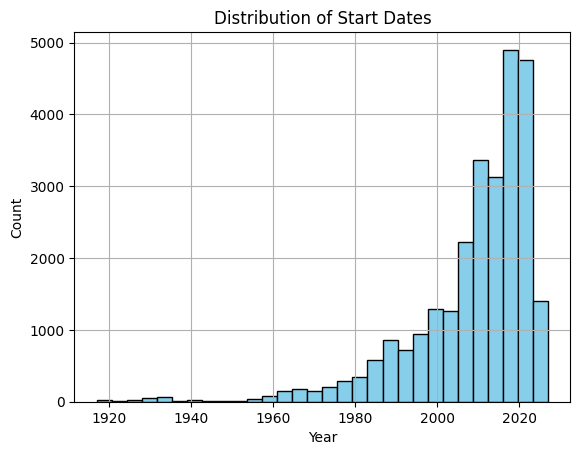

In [9]:
anime_df['start_date'].dropna().dt.year.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Dates')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

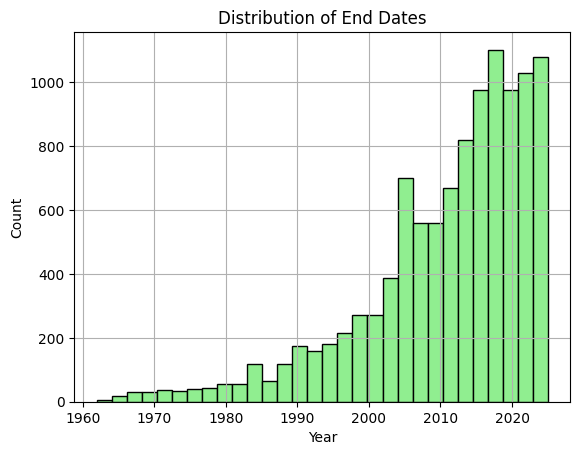

In [10]:
anime_df['end_date'].dropna().dt.year.hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of End Dates')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

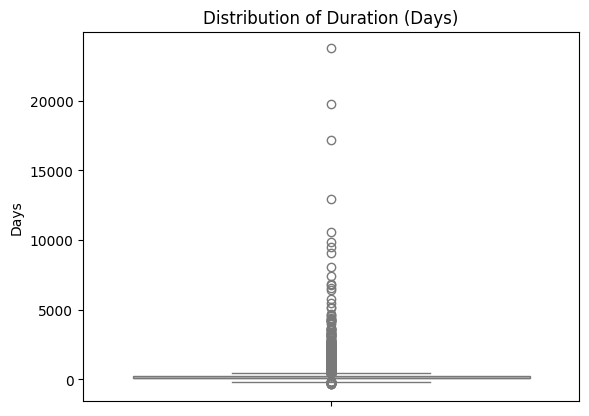

In [11]:
sns.boxplot(y=anime_df['duration'].dropna(), color='lightblue')
plt.title('Distribution of Duration (Days)')
plt.ylabel('Days')
plt.show()

In [12]:
anime_df['start_date'].isna().sum() & anime_df['end_date'].isna().sum()

np.int64(806)

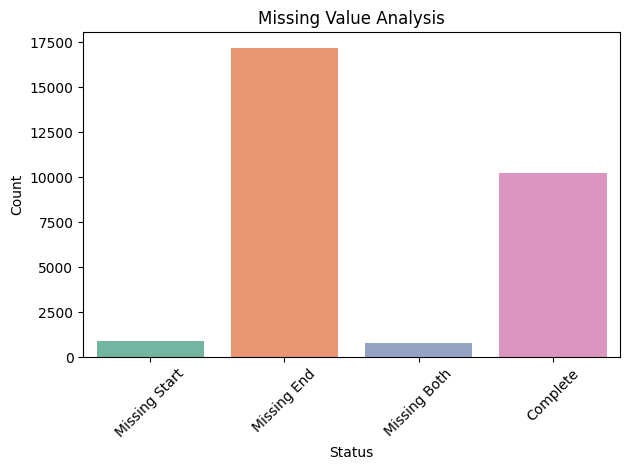

In [13]:
missing_data = pd.DataFrame({
    'Status': ['Missing Start', 'Missing End', 'Missing Both', 'Complete'],
    'Count': [
        anime_df['start_date'].isna().sum(),
        anime_df['end_date'].isna().sum(),
        anime_df['start_date'].isna().sum() & anime_df['end_date'].isna().sum(),
        anime_df['start_date'].notna().sum() & anime_df['end_date'].notna().sum()
    ]
})

sns.barplot(data=missing_data, x='Status', y='Count', palette='Set2')
plt.xticks(rotation=45)
plt.title('Missing Value Analysis')

plt.tight_layout()
plt.show()

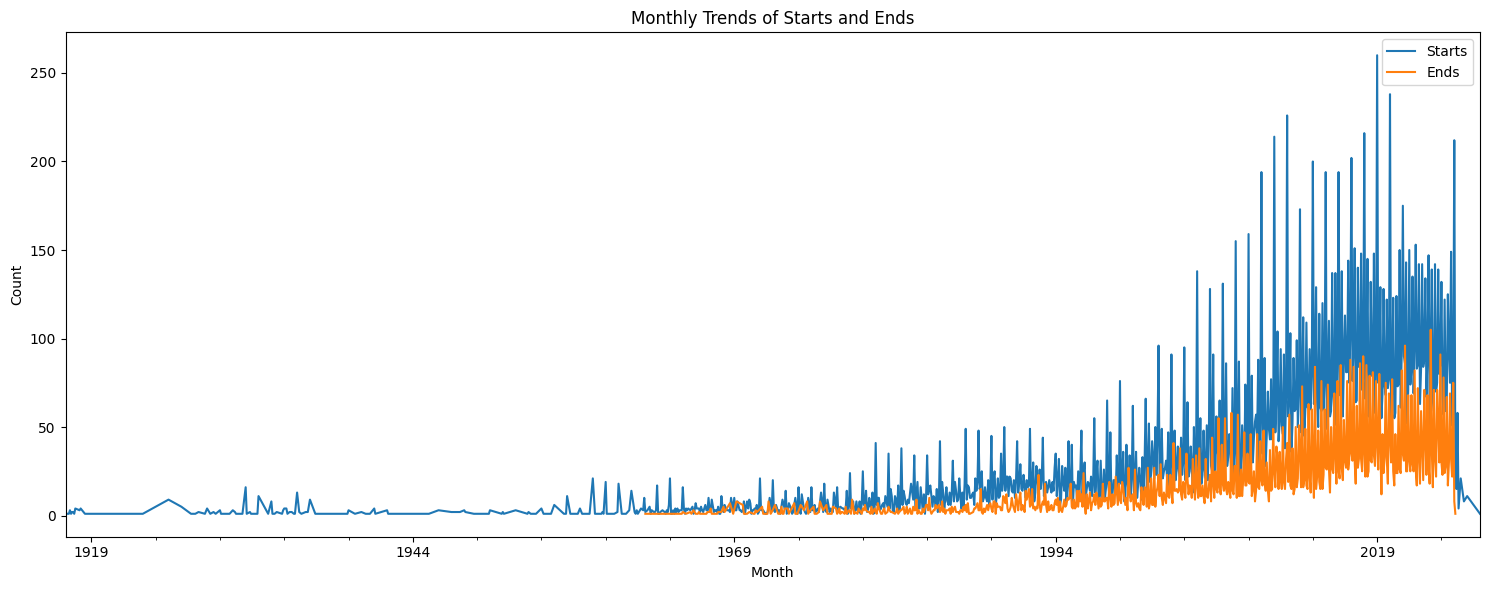

In [14]:
# Create a monthly trend analysis
monthly_starts = anime_df['start_date'].dropna().dt.to_period('M').value_counts().sort_index()
monthly_ends = anime_df['end_date'].dropna().dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(15, 6))
monthly_starts.plot(label='Starts')
monthly_ends.plot(label='Ends')
plt.title('Monthly Trends of Starts and Ends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

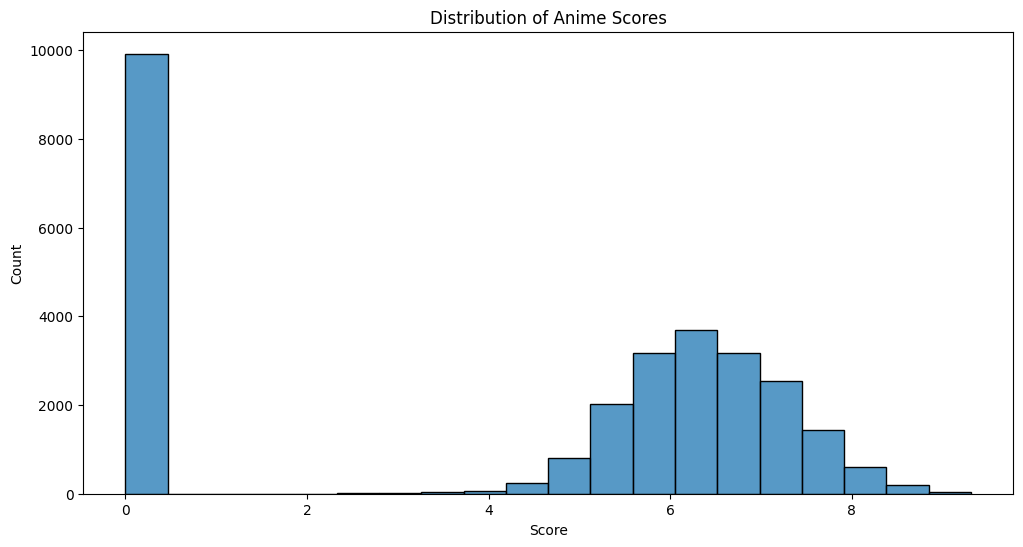

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=anime_df, x='score', bins=20)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

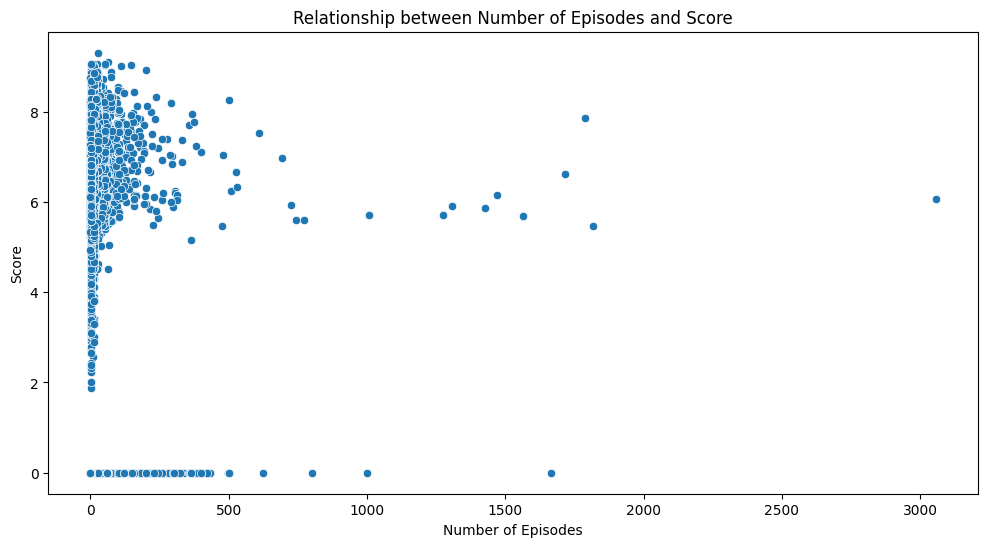

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anime_df, x='episodes', y='score')
plt.title('Relationship between Number of Episodes and Score')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

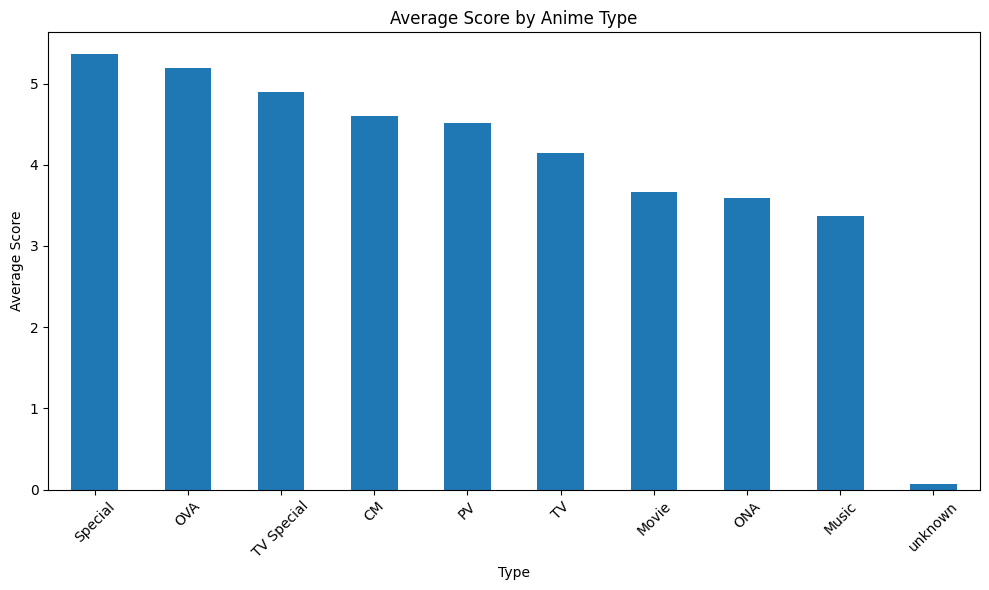

In [17]:
plt.figure(figsize=(10, 6))
anime_df.groupby('type')['score'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Score by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

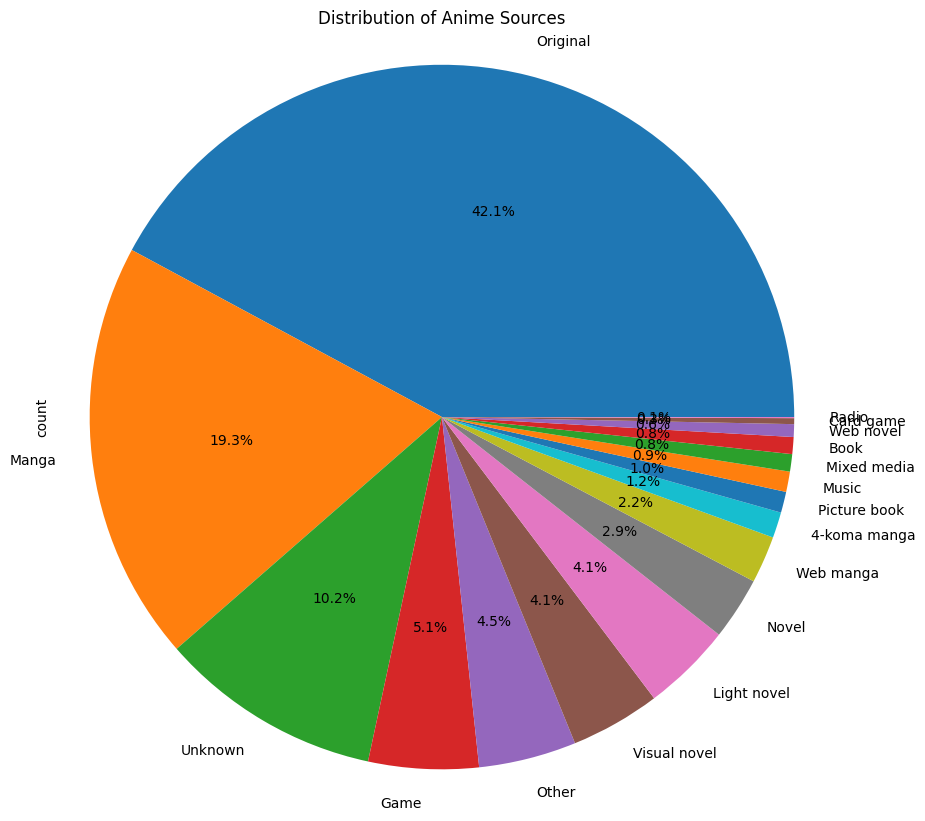

In [18]:
plt.figure(figsize=(10, 10))
anime_df['source'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Anime Sources')
plt.axis('equal')
plt.show()

In [19]:
anime_df['season'].value_counts()

season
spring    1929
fall      1750
winter    1263
summer    1095
Name: count, dtype: int64

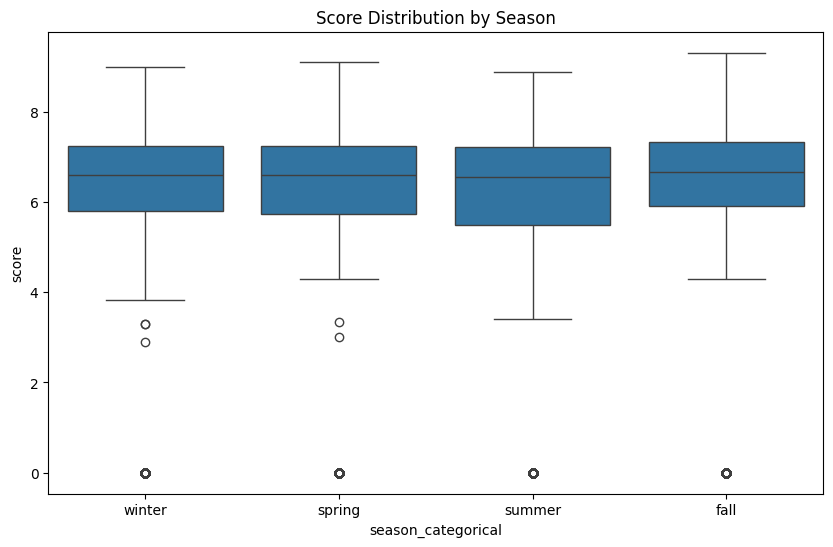

In [20]:
anime_df['season_categorical'] = pd.Categorical(anime_df['season'], 
                            categories=['winter', 'spring', 'summer', 'fall'], 
                            ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=anime_df, x='season_categorical', y='score')
plt.title('Score Distribution by Season')
plt.show()

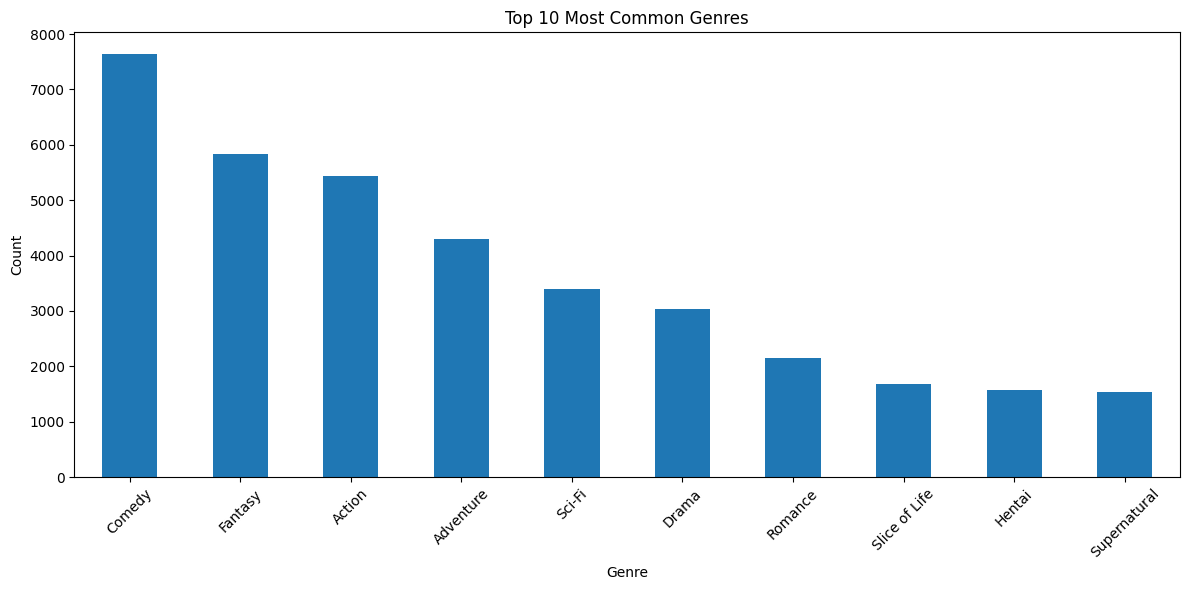

In [21]:
genres_df = anime_df.assign(genres=anime_df['genres'].str.split(';')).explode('genres')
genre_counts = genres_df['genres'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

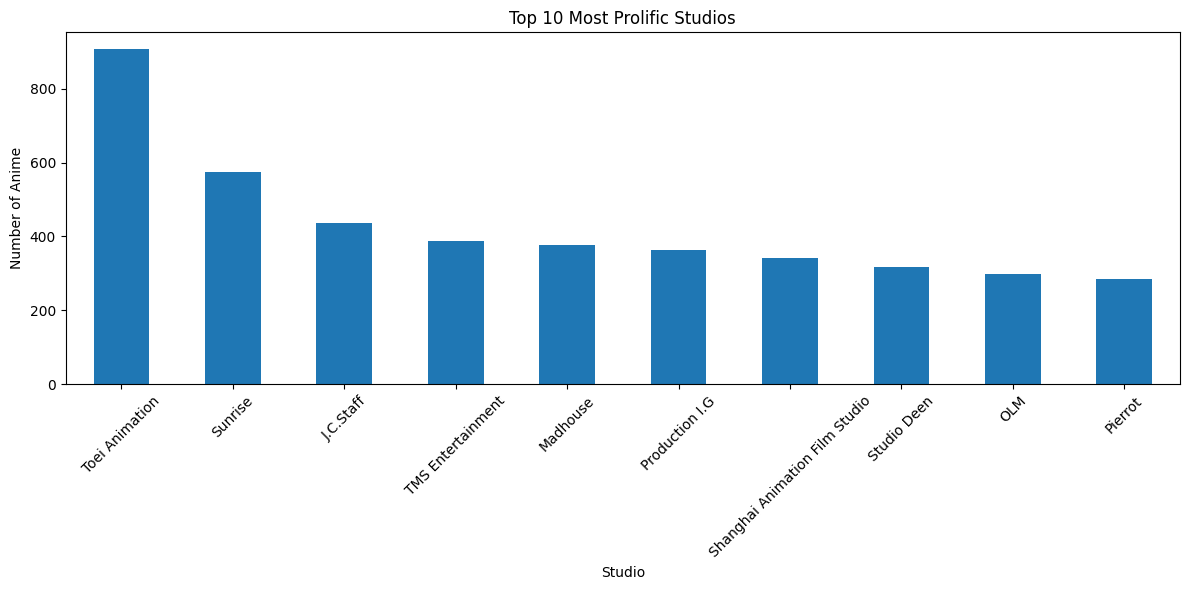

In [22]:
studio_counts = anime_df['studios'].str.split(';').explode().value_counts()
plt.figure(figsize=(12, 6))
studio_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Prolific Studios')
plt.xlabel('Studio')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

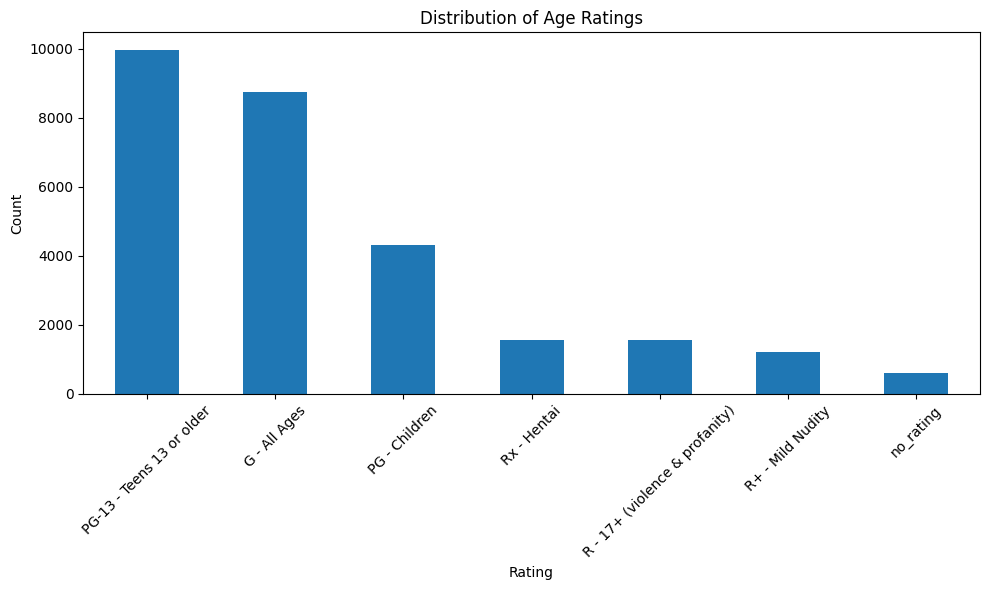

In [23]:
plt.figure(figsize=(10, 6))
anime_df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
genre_counts.head(10).index

Index(['Comedy', 'Fantasy', 'Action', 'Adventure', 'Sci-Fi', 'Drama',
       'Romance', 'Slice of Life', 'Hentai', 'Supernatural'],
      dtype='object', name='genres')

In [25]:
genres_df

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,season,year,start,ending,studios,genres,start_date,end_date,duration,season_categorical
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,spring,1998,1998-04-03,1999-04-24,Sunrise,Action,1998-04-03,1999-04-24,386.0,spring
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,spring,1998,1998-04-03,1999-04-24,Sunrise,Award Winning,1998-04-03,1999-04-24,386.0,spring
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,spring,1998,1998-04-03,1999-04-24,Sunrise,Sci-Fi,1998-04-03,1999-04-24,386.0,spring
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,False,R - 17+ (violence & profanity),8.38,...,NaN,2001,2001-09-01,NaN,Bones,Action,2001-09-01,NaT,NaN,NaN
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,False,R - 17+ (violence & profanity),8.38,...,NaN,2001,2001-09-01,NaN,Bones,Sci-Fi,2001-09-01,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,60748,Cyber,NaN,Music,Original,1,Finished Airing,False,PG-13 - Teens 13 or older,0.00,...,NaN,2024,2024-11-26,NaN,NaN,Horror,2024-11-26,NaT,NaN,NaN
27968,60749,Maomao no Hitorigoto 2nd Season,NaN,ONA,Light novel,0,Currently Airing,True,PG-13 - Teens 13 or older,0.00,...,NaN,2025,2025-01-13,NaN,TOHO animation STUDIO,Comedy,2025-01-13,NaT,NaN,NaN
27968,60749,Maomao no Hitorigoto 2nd Season,NaN,ONA,Light novel,0,Currently Airing,True,PG-13 - Teens 13 or older,0.00,...,NaN,2025,2025-01-13,NaN,TOHO animation STUDIO,Mystery,2025-01-13,NaT,NaN,NaN
27969,60765,Kimi to Koete Koi ni Naru,NaN,TV,Manga,0,Not yet aired,False,no_rating,0.00,...,NaN,2025,2025-10-01,NaN,NaN,Romance,2025-10-01,NaT,NaN,NaN


In [26]:
genre_analysis = genres_df.groupby('genres').agg({
    'score': ['mean', 'count']
}).reset_index()
genre_analysis

genres     score      
                       mean count
0          Action  5.573001  5439
1       Adventure  4.664846  4298
2     Avant Garde  3.145691   970
3   Award Winning  6.412559   254
4       Boys Love  5.949841   189
5          Comedy  4.655824  7648
6           Drama  5.330758  3034
7           Ecchi  6.246740   816
8         Erotica  5.122338    77
9         Fantasy  4.193090  5841
10     Girls Love  6.201983   116
11        Gourmet  4.609704   203
12         Hentai  6.037646  1563
13         Horror  5.224810   578
14        Mystery  6.205844   977
15        Romance  6.094034  2142
16         Sci-Fi  5.203676  3400
17  Slice of Life  4.464535  1676
18         Sports  5.240977   798
19   Supernatural  5.708310  1527
20       Suspense  6.172902   448

In [27]:
genre_analysis.columns = ['genre', 'avg_score', 'count']
genre_analysis

,genre,avg_score,count
0,Action,5.573001,5439
1,Adventure,4.664846,4298
2,Avant Garde,3.145691,970
3,Award Winning,6.412559,254
4,Boys Love,5.949841,189
5,Comedy,4.655824,7648
6,Drama,5.330758,3034
7,Ecchi,6.246740,816
8,Erotica,5.122338,77
9,Fantasy,4.193090,5841


In [28]:
top_10_genres = genre_analysis.nlargest(10, 'count').sort_values('avg_score', ascending=False)
top_10_genres

,genre,avg_score,count
15,Romance,6.094034,2142
12,Hentai,6.037646,1563
19,Supernatural,5.708310,1527
0,Action,5.573001,5439
6,Drama,5.330758,3034
16,Sci-Fi,5.203676,3400
1,Adventure,4.664846,4298
5,Comedy,4.655824,7648
17,Slice of Life,4.464535,1676
9,Fantasy,4.193090,5841


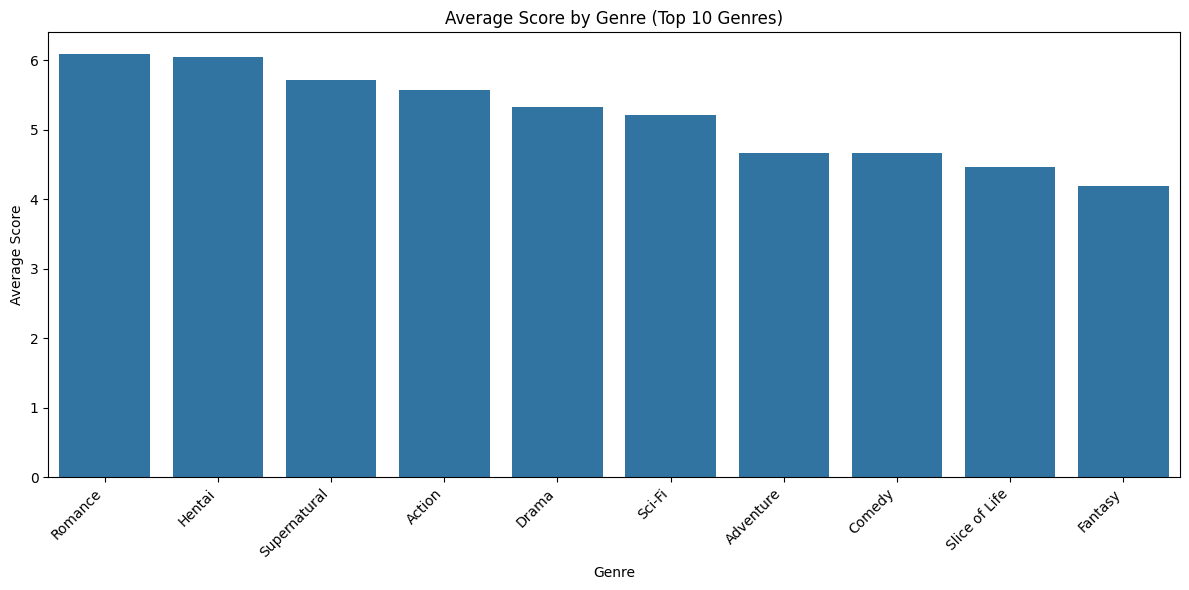

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres, x='genre', y='avg_score')

plt.title('Average Score by Genre (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

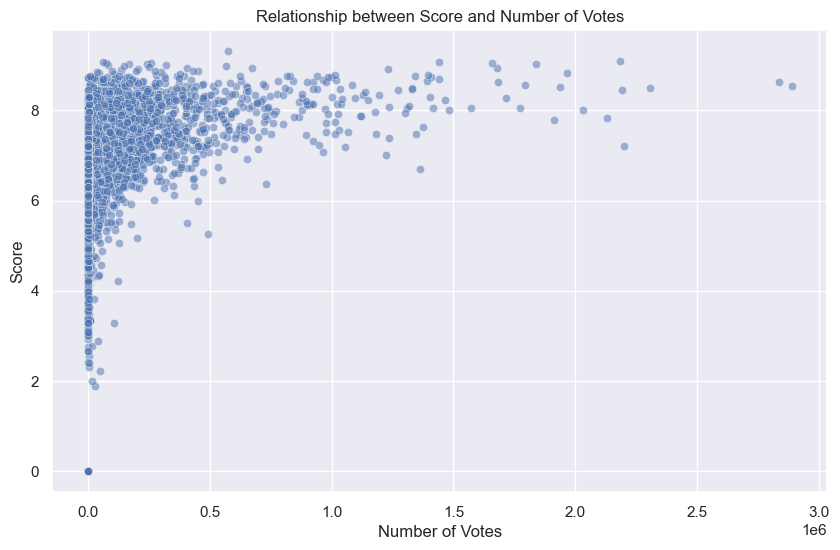

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_df, x='scored_by', y='score', alpha=0.5)
plt.title('Relationship between Score and Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Score')
plt.show()

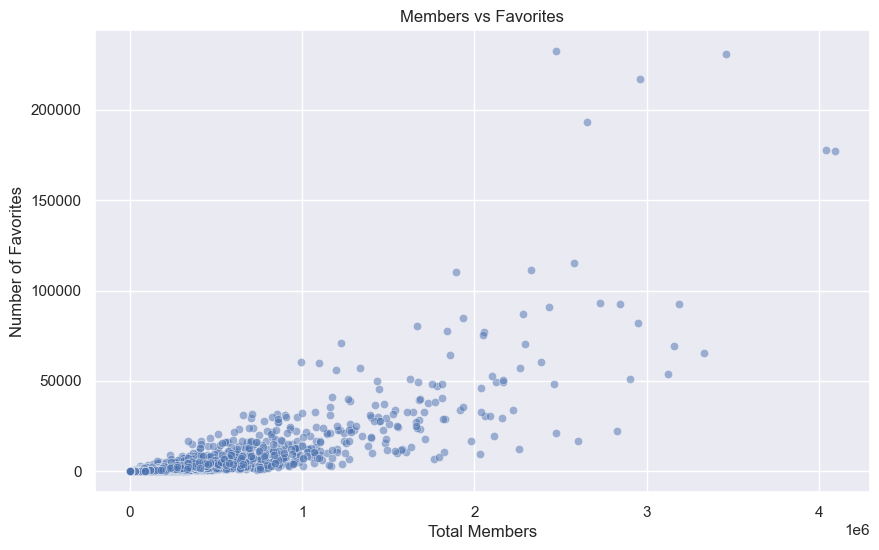

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_df, x='members', y='favorites', alpha=0.5)
plt.title('Members vs Favorites')
plt.xlabel('Total Members')
plt.ylabel('Number of Favorites')
plt.show()

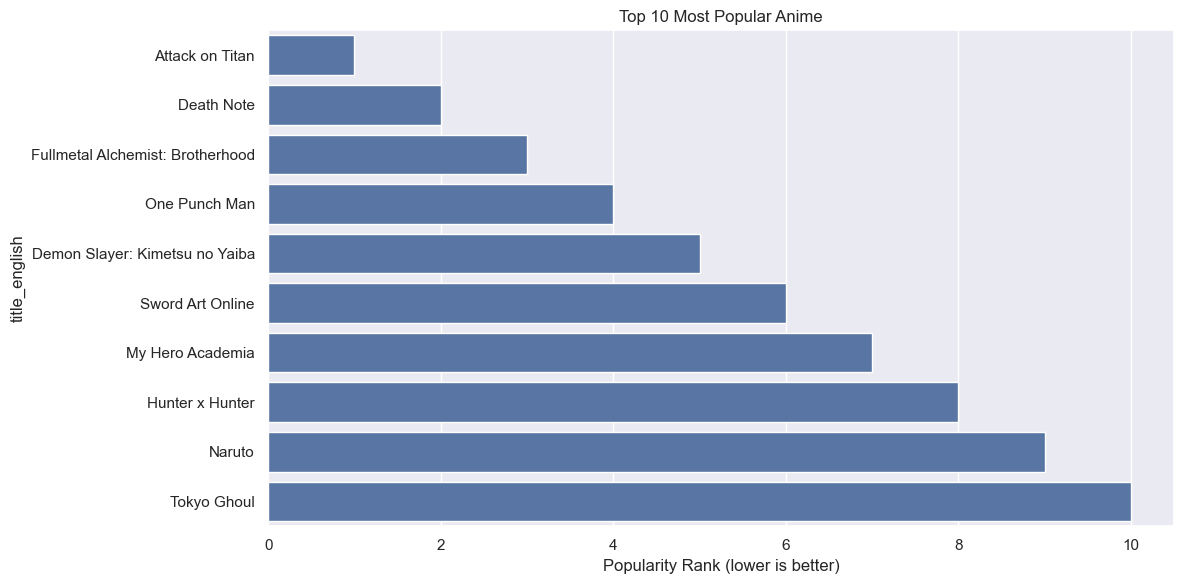

In [42]:
plt.figure(figsize=(12, 6))
top_popular = anime_df.nsmallest(10, 'popularity')[['title_english', 'popularity', 'score']]
sns.barplot(data=top_popular, x='popularity', y='title_english')
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Popularity Rank (lower is better)')
plt.tight_layout()
plt.show()

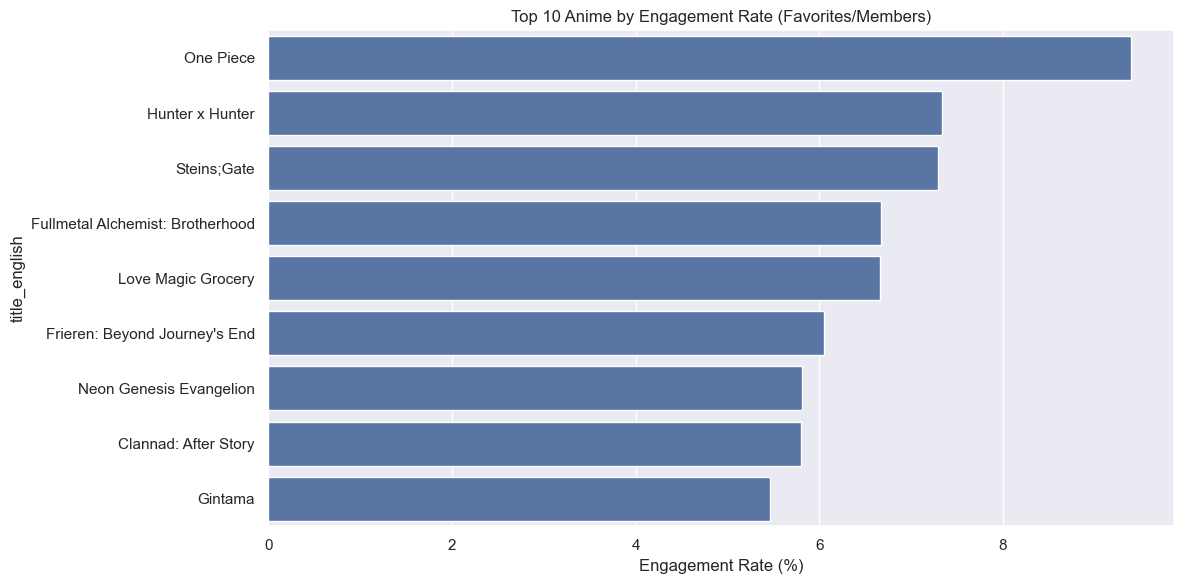

In [43]:
plt.figure(figsize=(12, 6))
anime_df['engagement_rate'] = anime_df['favorites'] / anime_df['members'] * 100
top_engaged = anime_df.nlargest(10, 'engagement_rate')
sns.barplot(data=top_engaged, x='engagement_rate', y='title_english')
plt.title('Top 10 Anime by Engagement Rate (Favorites/Members)')
plt.xlabel('Engagement Rate (%)')
plt.tight_layout()
plt.show()

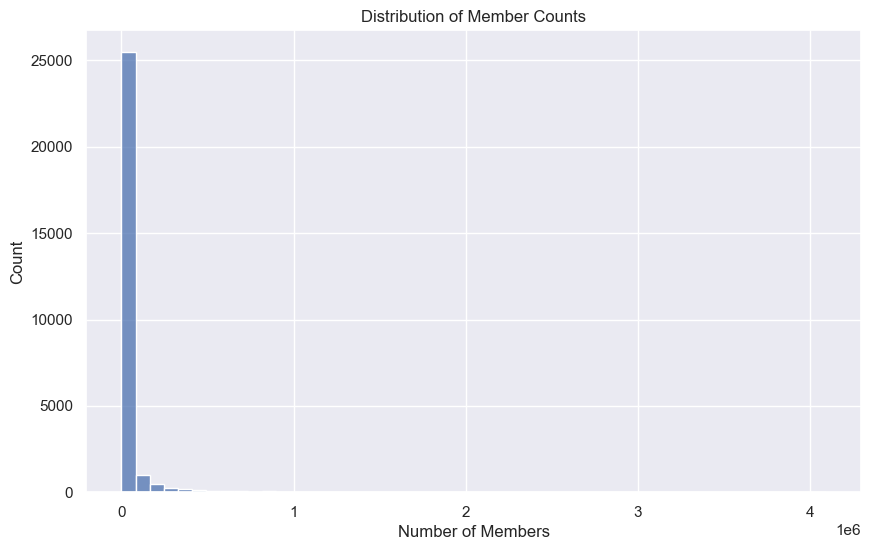

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data=anime_df, x='members', bins=50)
plt.title('Distribution of Member Counts')
plt.xlabel('Number of Members')
plt.ylabel('Count')
plt.show()

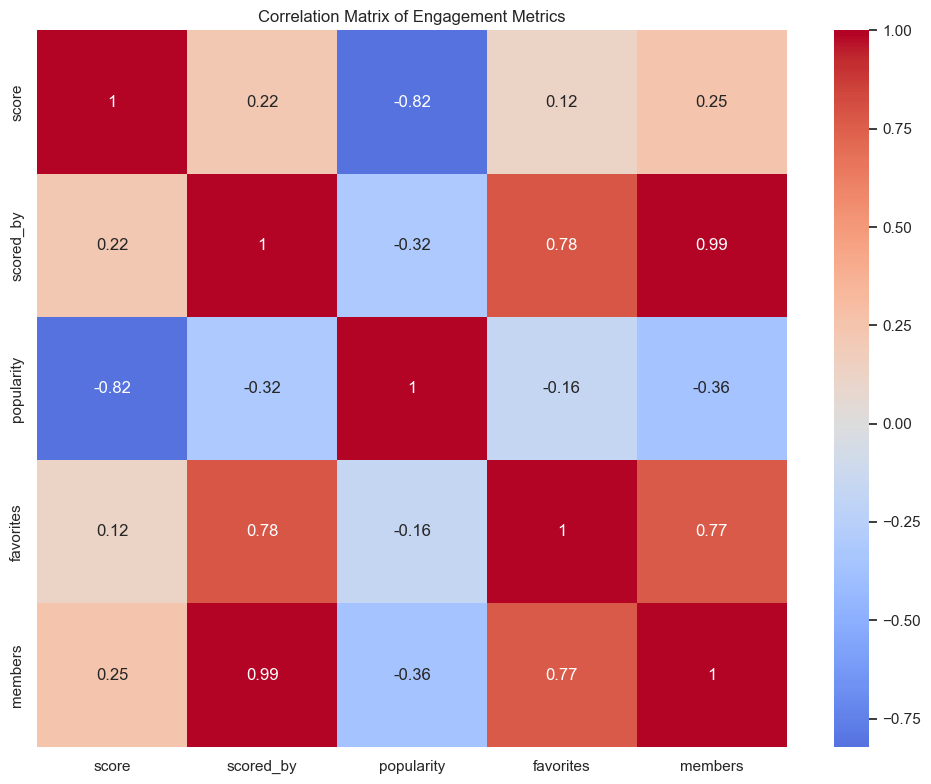

In [45]:
correlation_matrix = anime_df[['score', 'scored_by', 'popularity', 'favorites', 'members']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.show()

# Exploring Genres

In [30]:
genres_df = pd.read_csv('../dataset/genre_time_series.csv')
genres_df.head(5)

,year,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,0,116,121,2,0,4,132,80,8,4,...,3,0,3,15,43,49,17,15,20,6
1,1917,0,0,0,0,0,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1918,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1924,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1925,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
genres_df = genres_df.drop(genres_df.index[0])
genres_df.head(5)

,year,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
1,1917,0,0,0,0,0,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1918,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1924,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1925,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,1926,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
genres_list = list(genres_df.columns)[1:]
genres_list

['Action',
 'Adventure',
 'Avant Garde',
 'Award Winning',
 'Boys Love',
 'Comedy',
 'Drama',
 'Ecchi',
 'Erotica',
 'Fantasy',
 'Girls Love',
 'Gourmet',
 'Hentai',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life',
 'Sports',
 'Supernatural',
 'Suspense']

In [33]:
earliest = genres_df.iloc[0]['year']
newest = genres_df.iloc[-1]['year']
earliest, newest

(np.int64(1917), np.int64(2026))

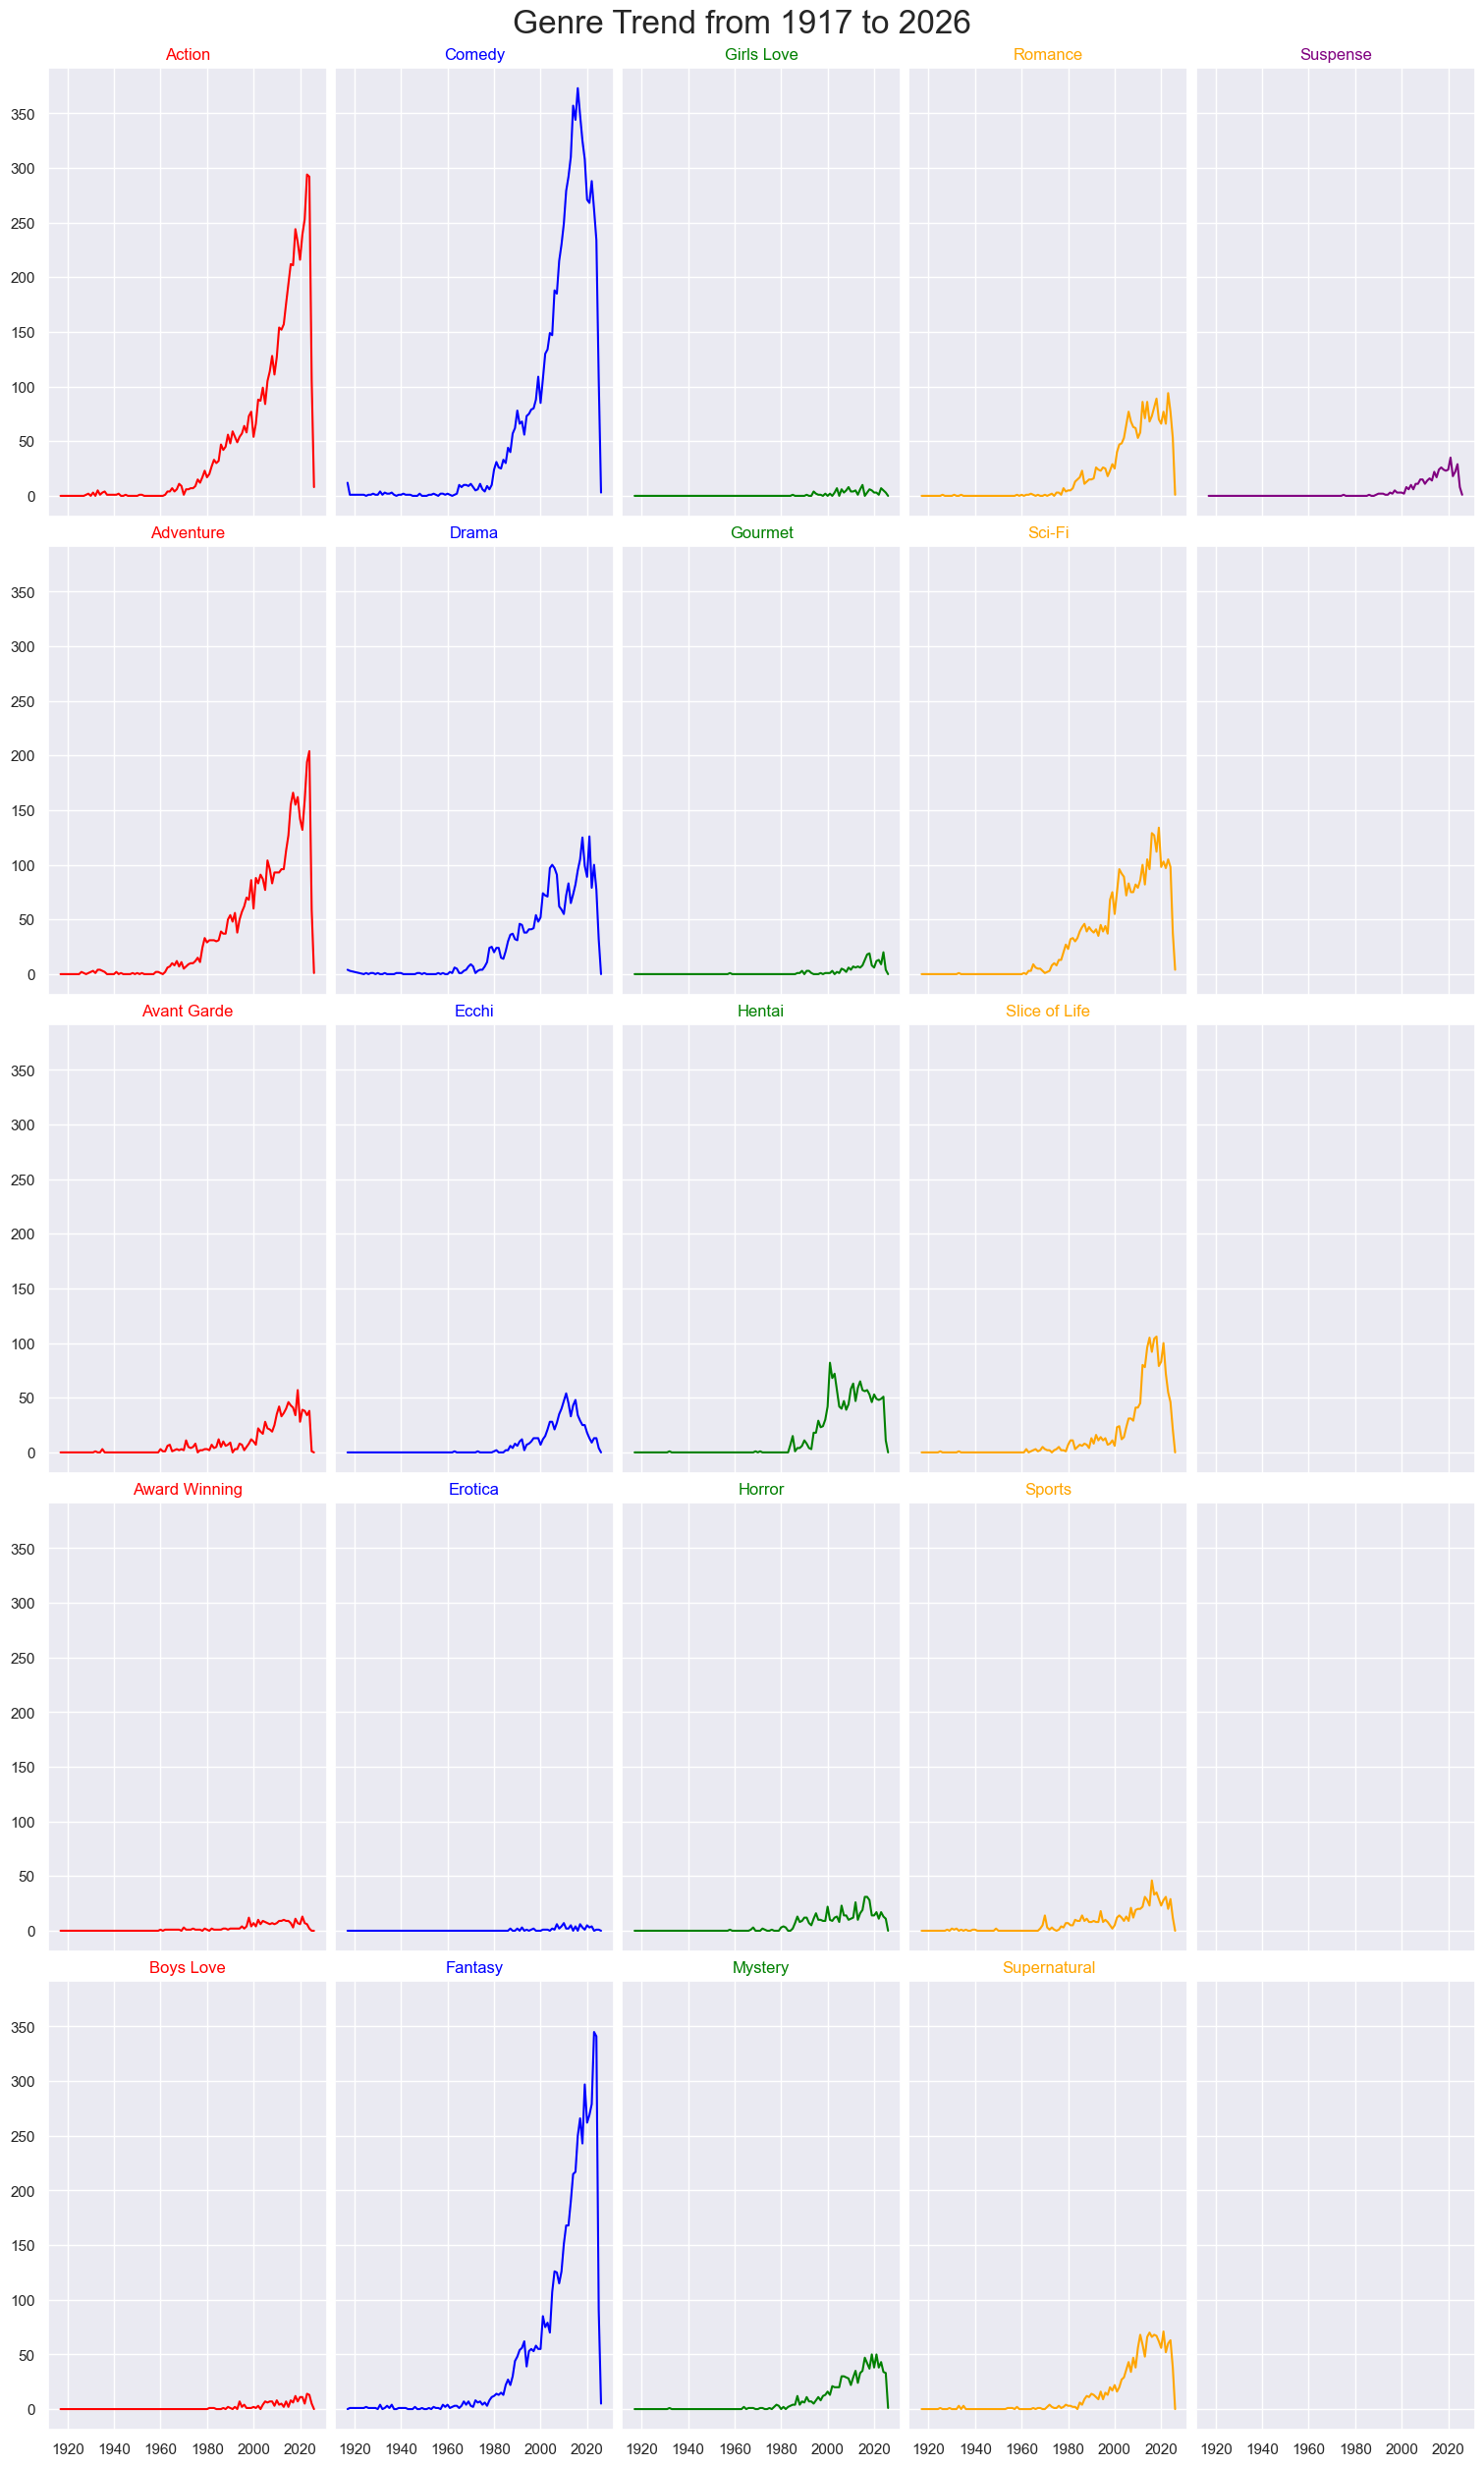

In [34]:
sns.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 5, figsize=(15, 25), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle(f'Genre Trend from {earliest} to {newest}', fontsize=24)

x_index = 0
y_index = 0

for genre in genres_list:
    axs[x_index, y_index].plot('year', genre, data=genres_df, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    if x_index == 4:
        x_index -= 5
        y_index += 1
    x_index += 1    

plt.show()

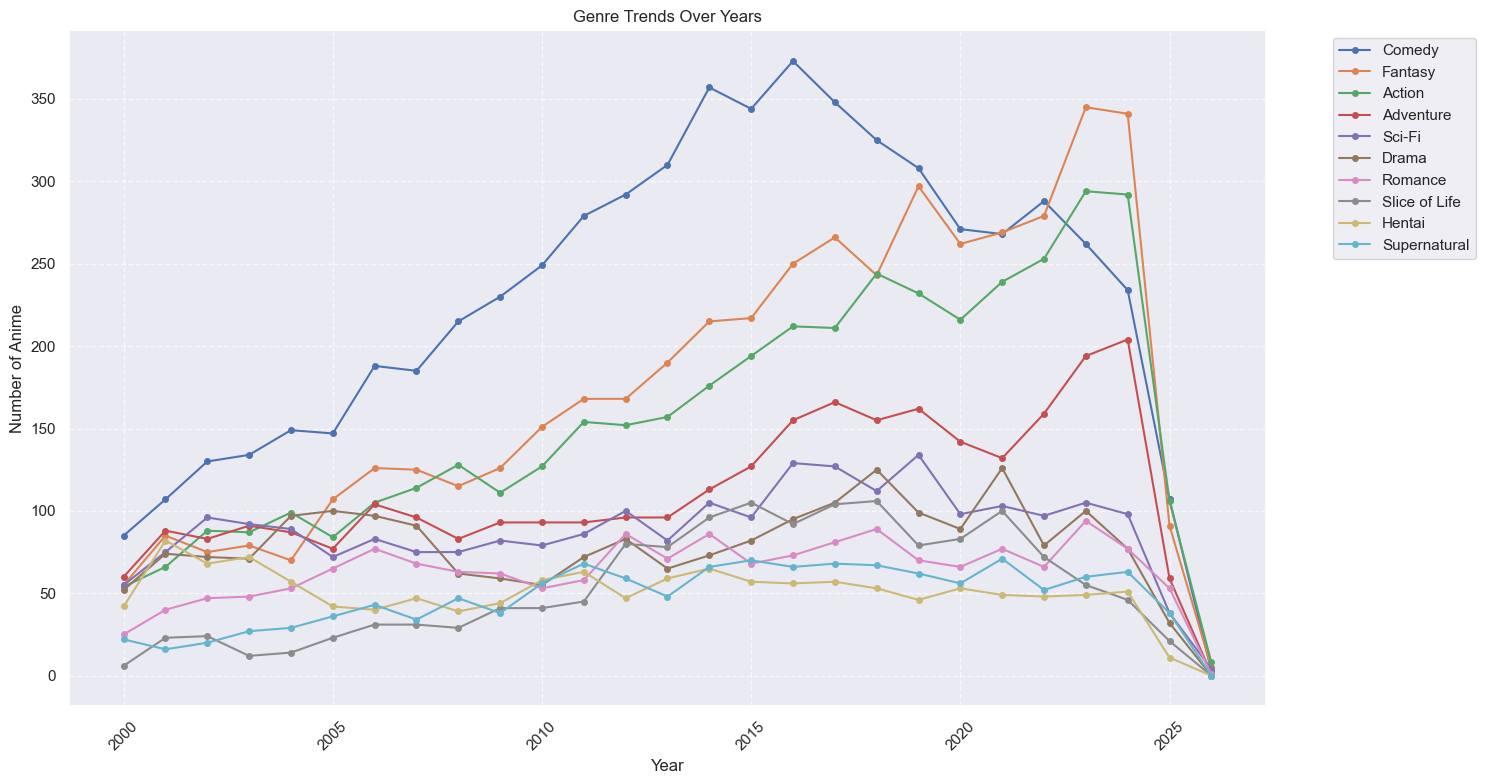

In [47]:
genres_by_year = anime_df.assign(genres=anime_df['genres'].str.split(';')).explode('genres')
# Filter 2000+
genres_by_year = genres_by_year[genres_by_year['year'] >= 2000]
# Get genre counts per year
genre_year_counts = genres_by_year.groupby(['year', 'genres']).size().unstack(fill_value=0)

# Get top 10 most common genres for cleaner visualization
top_10_genres = genres_by_year['genres'].value_counts().nlargest(10).index

# Create the line chart
plt.figure(figsize=(15, 8))

for genre in top_10_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre, marker='o', markersize=4)

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Anime')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
